# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [6]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [8]:
# Visit the website for the weather on Mars
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [9]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')


In [10]:
# Extract all rows of data

table = mars_soup.find('table', class_='table')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list

columns = []
data = []

# Loop through the rows

headings = table.find_all('th')
for heading in headings:
    columns.append(heading.get_text())

# Loop through the scraped data to create a list of rows

rows = table.find_all('tr', class_='data-row')

for row in rows:
    items = []
    row_data = row.find_all('td')
    for result in row_data:
        items.append(result.text)
    data.append(items)

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data, columns = columns)



In [13]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
mars_weather_df[mars_weather_df.columns[1]] = pd.to_datetime(mars_weather_df[mars_weather_df.columns[1]])
mars_weather_df[mars_weather_df.columns[2]] = mars_weather_df[mars_weather_df.columns[2]].astype(int)
mars_weather_df[mars_weather_df.columns[3]] = mars_weather_df[mars_weather_df.columns[3]].astype(int)
mars_weather_df[mars_weather_df.columns[4]] = mars_weather_df[mars_weather_df.columns[4]].astype(int) 
mars_weather_df[mars_weather_df.columns[5]] = mars_weather_df[mars_weather_df.columns[5]].astype(float) 
mars_weather_df[mars_weather_df.columns[6]] = mars_weather_df[mars_weather_df.columns[6]].astype(float)


In [16]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes



id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# Group the data by month and calculate the total number of sols
group_by_month = mars_weather_df.groupby('month')
total_sols_by_month = group_by_month['month'].count()

# Print the list of months with the total number of sols
print(total_sols_by_month)
print()

# Print the original statement
print(f"The number of months on Mars is: {mars_weather_df['month'].max()}")


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

The number of months on Mars is: 12


In [18]:
# 2. How many Martian days' worth of data are there?
print(f"The number of Martian days (sols) for which data was collected: {mars_weather_df['sol'].count()}") 

The number of Martian days (sols) for which data was collected: 1867


In [19]:
# 3. What is the average low temperature by month?
group_by_month = mars_weather_df.groupby('month')
avg_min_temp_by_month = group_by_month['min_temp'].mean()
print(avg_min_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


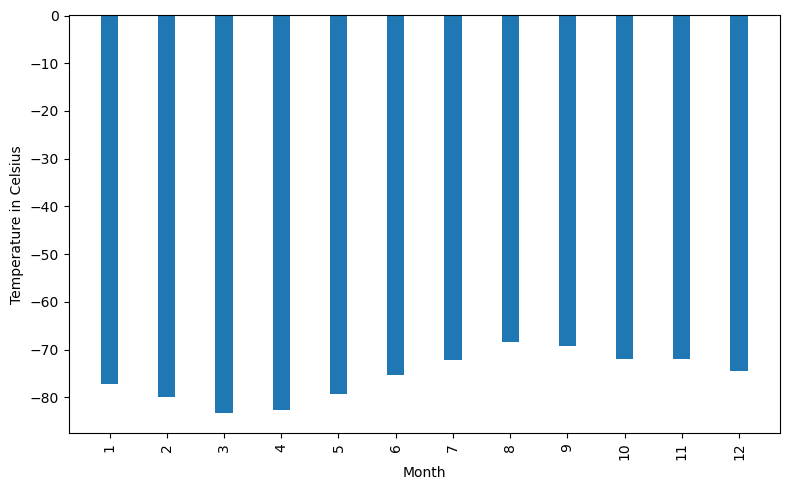

In [20]:
# Plot the average temperature by month

fig, ax = plt.subplots(figsize=[8, 5])
ax.bar(avg_min_temp_by_month.index, avg_min_temp_by_month, width=0.3, color='#1f77b4') # common blue color for visualizations
plt.xticks(ticks=range(1, 13, 1), rotation=90)
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Resources/mars_average_temp_by_month.png", dpi=300)
plt.show()




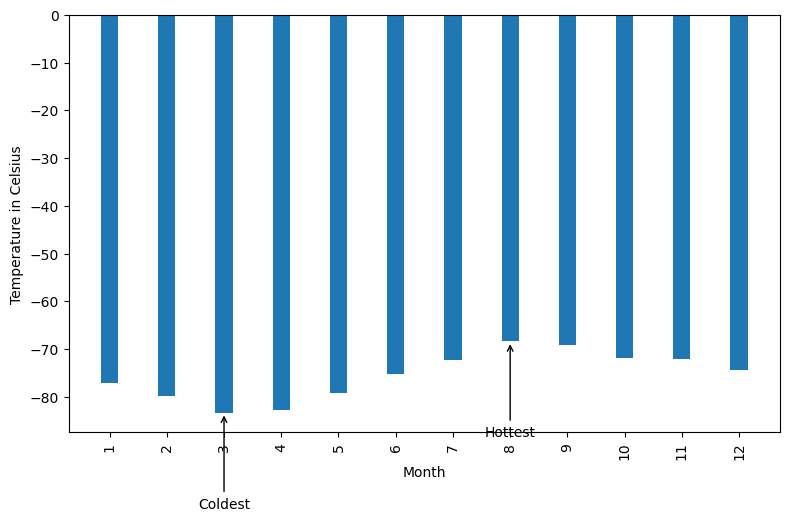

In [21]:
# Group the data by month and calculate the average minimum temperature
group_by_month = mars_weather_df.groupby('month')
avg_min_temp_by_month = group_by_month['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()

# Sort the data by temperature in ascending order
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

fig, ax = plt.subplots(figsize=[8, 5])
ax.bar(sorted_avg_min_temp.index, sorted_avg_min_temp, width=0.3, color='#1f77b4') # common blue color for visualizations
plt.xticks(ticks=sorted_avg_min_temp.index, rotation=90)
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.tight_layout()

# Add annotations for coldest and hottest months to the plot
ax.annotate('Coldest', xy=(coldest_month, sorted_avg_min_temp[coldest_month]),
            xytext=(coldest_month, sorted_avg_min_temp[coldest_month] - 20),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            ha='center') # ha = horizontal alignment
ax.annotate('Hottest', xy=(hottest_month, sorted_avg_min_temp[hottest_month]),
            xytext=(hottest_month, sorted_avg_min_temp[hottest_month] - 20),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            ha='center') # ha = horizontal alignment

# Save the plot as a PNG file
plt.savefig("Resources/mars_temp_extremes_by_month.png", dpi=300)
plt.show()



In [22]:
# 4. Average pressure by Martian month
group_by_month = mars_weather_df.groupby('month') 
avg_pressure_by_month = group_by_month['pressure'].mean() 
print(avg_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


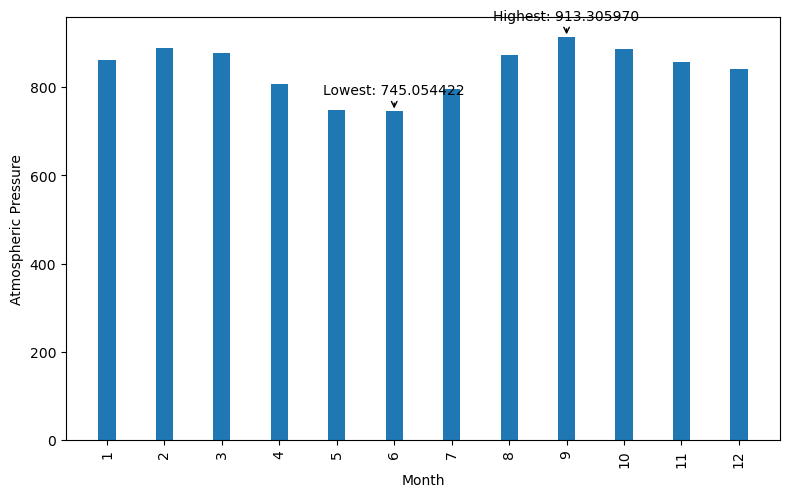

In [23]:
# Plot the average pressure by month
fig, ax = plt.subplots(figsize=[8, 5])
bars = ax.bar(avg_pressure_by_month.index, avg_pressure_by_month, width=0.3, color='#1f77b4') # common blue color for visualizations
plt.xticks(ticks=range(1, 13, 1), rotation=90)
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.tight_layout()

# Find the highest and lowest pressure values
highest_pressure = avg_pressure_by_month.max()
lowest_pressure = avg_pressure_by_month.min()

# Annotate the highest pressure
ax.annotate(f'Highest: {highest_pressure:.6f}', xy=(avg_pressure_by_month.idxmax(), highest_pressure),
            xytext=(0, 10),
            textcoords='offset points',
            ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->'))

# Annotate the lowest pressure
ax.annotate(f'Lowest: {lowest_pressure:.6f}', xy=(avg_pressure_by_month.idxmin(), lowest_pressure),
            xytext=(0, 10),
            textcoords='offset points',
            ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->'))

# Save the plot as a PNG file
plt.savefig("Resources/mars_average_pressure_by_month.png", dpi=300)
plt.show()



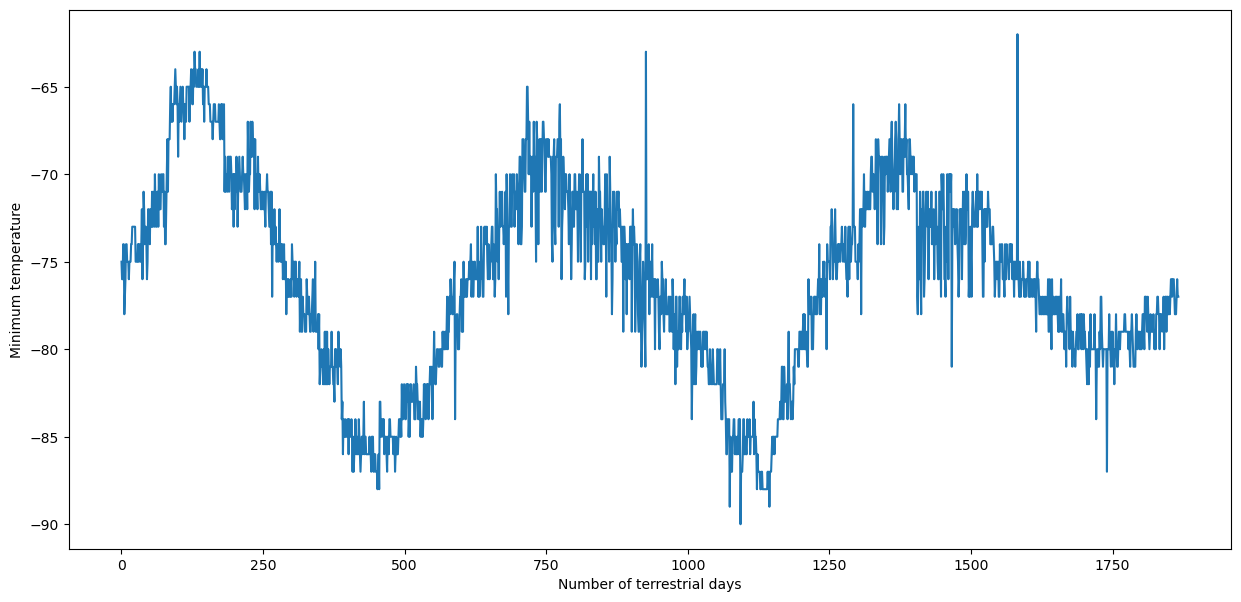

Terrestrial days in a Martian year: 675.709651



In [48]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Calculate the number of terrestrial days in one Martian sol
terrestrial_days_in_sol = mars_weather_df['terrestrial_date'].nunique() / mars_weather_df['sol'].nunique()

fig, ax = plt.subplots(figsize=[15, 7])
ax = plt.plot(range(len(mars_weather_df)), mars_weather_df['min_temp'], color='#1f77b4') # common blue color for visualizations
plt.xticks(ticks=range(0, len(mars_weather_df), 250), labels=range(0, len(mars_weather_df), 250))
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')

# Save the plot as a PNG file
plt.savefig("Resources/mars_days_in_terrestrial_year.png", dpi=300)

# Show the plot
plt.show()

# Find the number of months in the dataset
mars_months = np.unique(mars_weather_df['month'])

# Calculate the number of sols in a Martian year
''' 1 Martian day = 24.66 hours (https://www.rmg.co.uk/stories/topics/how-long-day-on-mars#:~:text=year%20on%20Mars%3F-,Mars%20is%20a%20planet%20with%20a%20very%20similar%20daily%20cycle,than%20a%20day%20on%20Earth.)'''
sols = 0
for mm in mars_months:
    sol_duration = mars_weather_df.loc[mars_weather_df['month'] == mm, 'sol'].max() - mars_weather_df.loc[mars_weather_df['month'] == mm, 'sol'].min()
    sols += (sol_duration / 24.66) # using the average Martian day duration from the resource above

# Print the number of terrestrial days in a Martian year
print(f'Terrestrial days in a Martian year: {sols:.6f}\n')






On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the dataframe data a to CSV file
mars_weather_df.to_csv("Resources/mars_weather_data_dataframe.csv", index=False)


In [145]:
# Conclude with resource cleanup
browser.quit()